In [1]:
import krstc_utils as kutils
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [2]:
run = 71
df, runtype, des = kutils.load_dsp(run=run,
                     params=[['trapEmax','tp_0','tp_50', 'tp_20', 'stp_20', 'triE']], verbose=False)
df['ToE'] = df['triE']/df['trapEmax']
print(df.cycle.unique())
print(runtype, des)
df


[3294 3295 3296 ... 3312 3313 3314]
kry 2023/04/25, bias 2300 V, closed turbopump valve, source still open


,trapEmax,tp_0,tp_50,tp_20,stp_20,triE,trapEmax_cal_keV,pulse_rise_time_ns,run,cycle,runtime_s,ToE
0,332.386353,39530.0,40000.0,39930.0,39910.0,205.604858,131.492035,380.0,71,3294,1500.017705,0.618572
1,459.943207,39310.0,40160.0,40040.0,40010.0,257.757141,181.953522,700.0,71,3294,1500.017705,0.560411
2,935.228638,39530.0,40290.0,40160.0,40140.0,503.915070,369.976440,610.0,71,3294,1500.017705,0.538815
3,354.831757,39180.0,40070.0,39960.0,39930.0,201.024338,140.371445,750.0,71,3294,1500.017705,0.566534
4,687.276917,39290.0,40230.0,40090.0,40080.0,386.735596,271.886749,790.0,71,3294,1500.017705,0.562707
...,...,...,...,...,...,...,...,...,...,...,...,...
69861,2129.253906,39190.0,40510.0,40360.0,40350.0,1024.945801,842.332825,1160.0,71,3314,870.070975,0.481364
69862,265.995087,39160.0,40130.0,39800.0,39790.0,117.204308,105.227654,630.0,71,3314,870.070975,0.440626
69863,617.718750,39810.0,40030.0,39960.0,39950.0,385.285309,244.369537,140.0,71,3314,870.070975,0.623723
69864,19.058516,38340.0,40650.0,40170.0,38720.0,12.604206,7.539548,380.0,71,3314,870.070975,0.661343


Text(0.5, 1.0, 'Superpulses for different event types (aligned at tp_0)')

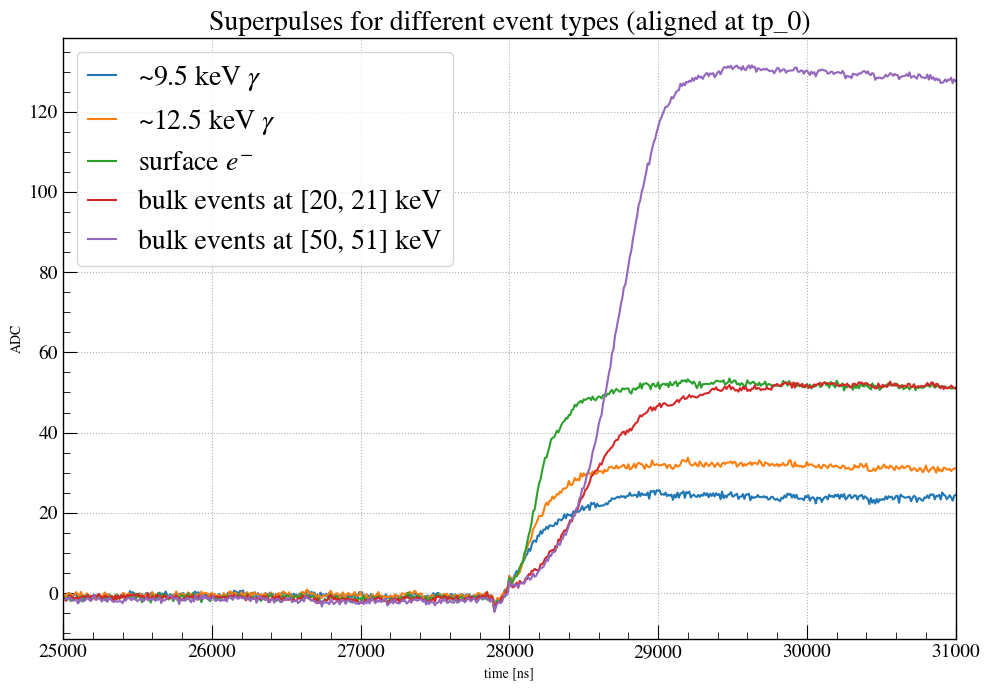

In [6]:
lw = 1.5
nwfs = 100
random_state = 20
align_at = 'tp_0'

savgol = False

superpulses = []


# 9.4 keV gamma events
ecal_range = [9, 10]
toe_range = [0.64, 0.72]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])

d1 = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d1,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               savgol=savgol,
               superpulse_label='~9.5 keV $\gamma$',
               lw=lw)
superpulses.append(sp)



# 12.5 keV gamma events
ecal_range = [12,13]
toe_range = [0.6, 0.7]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])

d2 = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d2,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               savgol=savgol,
               superpulse_label='~12.5 keV $\gamma$',
               lw=lw)
superpulses.append(sp)

# surface electron events
ecal_range = [20,21]
toe_range = [0.63, 0.7]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])


d3 = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d3,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               savgol=savgol,
               superpulse_label='surface $e^{-}$',
               lw=lw)
superpulses.append(sp)


# bulk events
ecal_range = [20,21]
toe_range = [0.53, 0.58]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])


d4 = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d4,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               savgol=savgol,
               superpulse_label='bulk events at '+str(ecal_range)+' keV',
               lw=lw)
superpulses.append(sp)


# bulk events at higher energy
ecal_range = [50,51]
toe_range = [0.53, 0.58]
ecal_cut = (df['trapEmax_cal_keV'] > ecal_range[0]) & (df['trapEmax_cal_keV'] < ecal_range[1])
toe_cut = (df['ToE'] > toe_range[0]) & (df['ToE'] < toe_range[1])


d5 = df[ecal_cut & toe_cut].sample(n=nwfs, random_state=random_state)

sp = kutils.get_superpulse(d5,
               shift_to=28000,
               shift_from=align_at,
               plot_shifted=False,
               plot_superpulse=True,
               savgol=savgol,
               superpulse_label='bulk events at '+str(ecal_range)+' keV',
               lw=lw)
superpulses.append(sp)


plt.ylabel('ADC')
plt.title('Superpulses for different event types (aligned at '+align_at+')')


        trapEmax_cal_keV     tp_0  run  cycle  run  cycle  run  cycle  run  \
15699          20.100790  39250.0   71   3304   71   3304   71   3304   71   
39880          20.358210  39060.0   71   3307   71   3307   71   3307   71   
16255          20.787373  39110.0   71   3308   71   3308   71   3308   71   
117885         20.618135  39060.0   71   3310   71   3310   71   3310   71   
21967          20.479689  39050.0   71   3294   71   3294   71   3294   71   
5760           20.581079  39110.0   71   3304   71   3304   71   3304   71   
32055          20.890741  39190.0   71   3311   71   3311   71   3311   71   
40655          20.967136  38410.0   71   3310   71   3310   71   3310   71   
115180         20.395979  39180.0   71   3310   71   3310   71   3310   71   
53766          20.824461  37920.0   71   3305   71   3305   71   3305   71   
54515          20.874954  39050.0   71   3300   71   3300   71   3300   71   
96043          20.218836  38710.0   71   3312   71   3312   71  

(-20.0, 80.0)

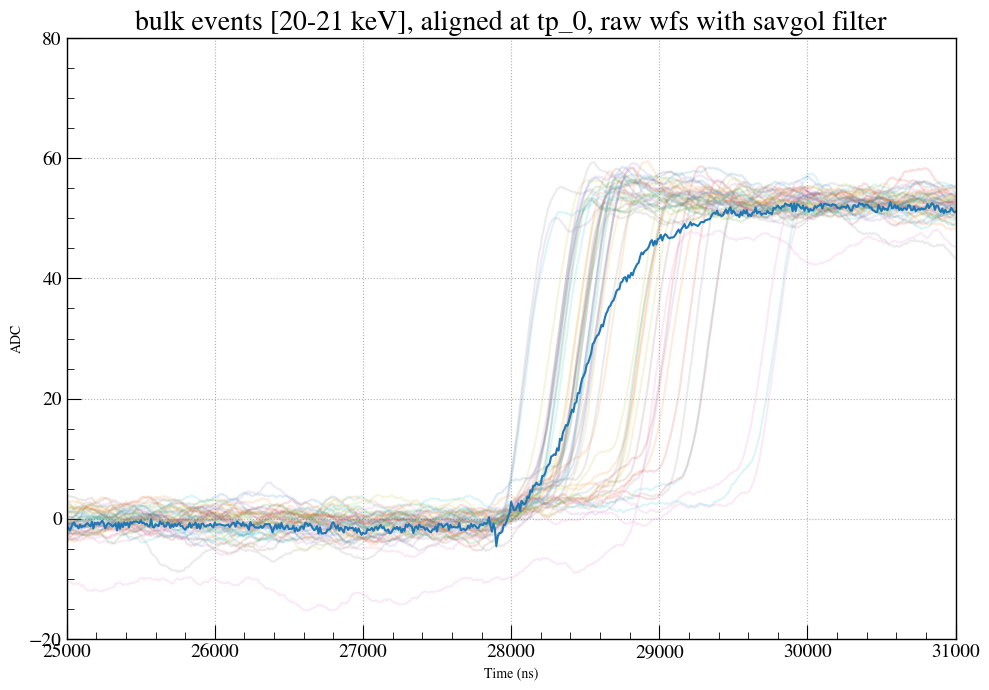

In [17]:
times = np.arange(0, len(superpulses[0])*10, 10)
#plt.plot(times, superpulses[3], label='bulk events at higher energy', lw=lw)

# get the raw wfs
dd = d4.sample(n=50, random_state=1)
kutils.get_raw_wfs(dd, align_at=align_at, lw=lw, alpha=0.15, label='raw wfs', savgol=True)

plt.plot(times, superpulses[3], label='bulk events at higher energy', lw=lw)


plt.xlim(25000, 31000)
plt.title('bulk events [20-21 keV], aligned at '+align_at+', raw wfs with savgol filter')

plt.ylim(-20, 80)

Text(0.5, 0.98, 'FFT of superpulses, run 83')

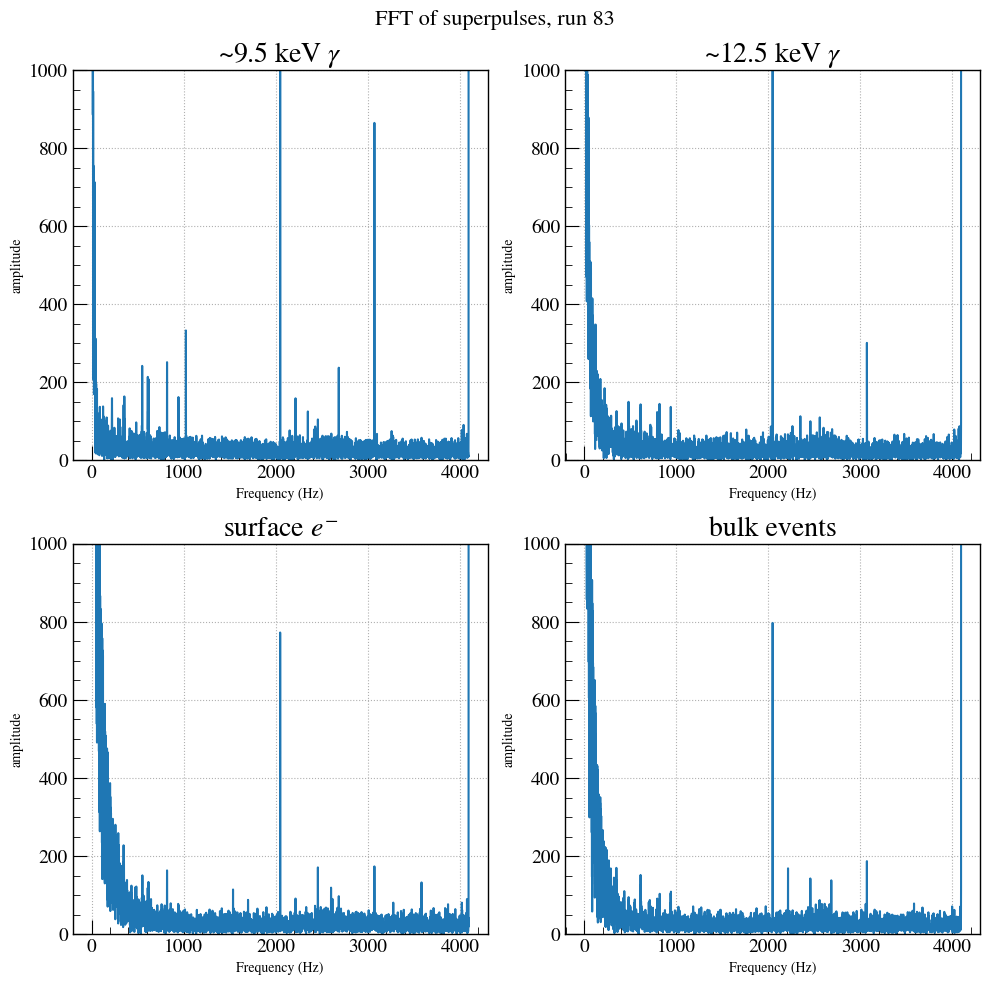

In [46]:
titles = ['~9.5 keV $\gamma$', '~12.5 keV $\gamma$', 'surface $e^{-}$', 'bulk events']
# plot all superpulses in a 2x2 grid
fig, ax = plt.subplots(2,2, figsize=(10,10))
for i in range(2):
    for j in range(2):
        # fft superpulse
        sp_fft = np.fft.rfft(superpulses[i*2+j])

        #freq = np.fft.rfftfreq(len(superpulses[i*2+j]), d=1/100e6)
        #print(freq[np.argmax(np.abs(sp_fft))])
        ax[i,j].plot(np.abs(sp_fft), lw=1.5)
        #ax[i,j].set_title(superpulses[i*2+j].name)
        ax[i,j].set_ylabel('amplitude')
        ax[i,j].set_xlabel('Frequency (Hz)')
        ax[i,j].set_ylim(0,1000)
        # titles
        ax[i,j].set_title(titles[i*2+j])

plt.tight_layout()
# set title
fig.suptitle('FFT of superpulses, run 83', fontsize=16)

In [21]:
# load csv
cal_consts = pd.read_csv('calibration_constants.csv')
cal_consts.iloc[70:75]

,Run,p0,p1,p2
70,70,0.0,0.3956,0.0
71,71,0.0,0.3956,0.0
72,72,0.0,0.3956,0.0
73,73,0.0,0.3956,0.0
74,74,0.0,0.3956,0.0


In [25]:
cal_consts[cal_consts['Run']==71]['p1']

71    0.3956
Name: p1, dtype: float64